In [112]:
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.model_selection import train_test_split

In [113]:
column_names = ["Status of existing checking account", "Duration in Month", "Credit history", "Purpose", "Credit amount", "Saving account/bonds", "Present employment since", "Installment rate in percentage of disposable income", "Personal status and sex", "Other debtors", "Present residence since", "Property", "Age in years", "Other installment plans", "Housing", "Num of existing credits at this bank", "Job", "Number of people being liable to provide maintenance for", "Telephone", "foreign worker", "Customer"]
df = pd.read_csv("./Data/german.data", sep=" ",index_col=None, names=column_names)

In [114]:
enc = LabelEncoder()
for column in df.columns:
    df[column] = enc.fit_transform(df[column])

In [115]:
y = df["Customer"]
x = df.drop(columns="Customer")

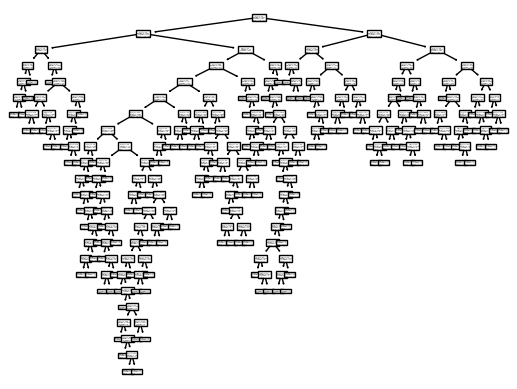

In [116]:
data_train, data_test, class_train, class_test = train_test_split(x, y)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(data_train, class_train)
class_pred_tree = clf.predict(data_test)
plot_tree(clf);

In [117]:
tree_graph = export_graphviz(clf, feature_names=x.columns, class_names=["0", "1"], filled=True)
tree_graph = graphviz.Source(tree_graph)
tree_graph.render("DecisionTree_GermanCredit")

'DecisionTree_GermanCredit.pdf'

In [118]:
clf_forest = RandomForestClassifier(criterion="entropy")
clf_forest = clf_forest.fit(data_train, class_train)
pred_forest = clf_forest.predict(data_test)

In [119]:
# Precision Tree
acc_tree = accuracy_score(class_test, class_pred_tree)
precision_tree = precision_score(class_test, class_pred_tree, average="binary")
recall_tree = recall_score(class_test, class_pred_tree)
# Random Forest
acc_forest = accuracy_score(class_test, pred_forest)
precision_forest = precision_score(class_test, pred_forest, average="binary")
recall_forest = recall_score(class_test, pred_forest)

In [120]:
print(f"Random Forest: \n"
     f"Accuracy: {acc_forest:.2f}, Precision: {precision_forest:.2f}, Recall: {recall_forest:.2f}\n")

print(f"Decision Tree: \n"
      f"Accuracy: {acc_tree:.2f}, Precision: {precision_tree:.2f}, Recall: {recall_tree:.2f}")

Random Forest: 
Accuracy: 0.75, Precision: 0.68, Recall: 0.42

Decision Tree: 
Accuracy: 0.65, Precision: 0.45, Recall: 0.40
